In [8]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from import_data import DataSource
from clean_na import Clean_na
from feat_engineering import Feature_engineering
from import_data import Busca
from feat_select import Feat_select
from model_training import ModelTraining
from model_inference import ModelInference
from get_recomend import Recomendation

In [28]:
inicio = time.time()
pd.read_csv('../output/group.csv')
fim = time.time()
print(f'o tempo foi de {round((fim - inicio)/60,2)} minutos')

o tempo foi de 0.01 minutos


/home/lucas/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/lucas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'scaler': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000), 'pca': PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'modelo': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=6, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)}
Carregando o modelo


/home/lucas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/lucas/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


Foi recomendado: 32.9 % da lista total que são: 70.77 % similares a seus clientes
--------------------------------------------------------------------------------
nm_segmento_change
seus clientes: most_comom0.24 ⊢ 2.00 = 17.0% e most_comom19.81 ⊢ 106.44 = 16.0% 
recomendados: most_comom2.00 ⊢ 4.15 = 19.0% e most_comom4.15 ⊢ 6.93 = 19.0% 
--------------------------------------------------------------------------------
de_ramo_change
seus clientes: COMERCIO VAREJISTA = 89.0%  
recomendados: COMERCIO VAREJISTA = 92.0% 
--------------------------------------------------------------------------------
de_natureza_juridica_change
seus clientes: EMPRESARIO INDIVIDUAL = 89.0%  
recomendados: EMPRESARIO INDIVIDUAL = 92.0% 
--------------------------------------------------------------------------------
nm_divisao_change
seus clientes: Comercio Varegista0.24 ⊢ 2.00 = 89.0%  
recomendados: Comercio Varegista2.00 ⊢ 4.15 = 92.0% 
----------------------------------------------------------------------

/home/lucas/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


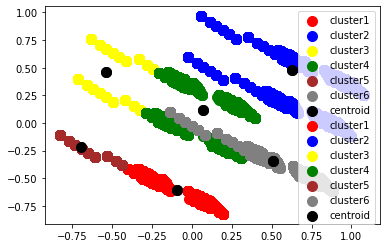

In [9]:
# todo modelo

inicio = time.time()

df = DataSource().read_data()
df = Clean_na().drop_col(5,df)
df.drop(['Unnamed: 0', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'qt_filiais'],axis=1,inplace=True)
df = Clean_na().drop_low_var(7,df)
df.drop('dt_situacao', axis=1, inplace=True)
id_df = df['id'].copy()
df_reduced = df.drop('id', axis=1)
df_colum_changed = Feature_engineering().change_columns(df_reduced)
df_labeled = Feature_engineering().encoder(df_colum_changed)
port1, port2, port3, id1, id2, id3 = Busca().busca_id()
df_choiced = df_labeled[['nm_segmento_change','de_ramo_change','de_natureza_juridica_change','nm_divisao_change','de_nivel_atividade_change','idade_change']]
modelo, group = ModelTraining().model_training(df_choiced)
df1 = pd.read_csv('../data/estaticos_portfolio1.csv')
pred1 = ModelInference().predict(df1)
features_recomendadas = Recomendation().leads(pred1, group)

fim = time.time()
print(f'o tempo foi de {round((fim - inicio)/60,2)} minutos')

/home/lucas/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/home/lucas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{'scaler': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000), 'pca': PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'modelo': KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=6, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)}
o tempo foi de 1.2 minutos


/home/lucas/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


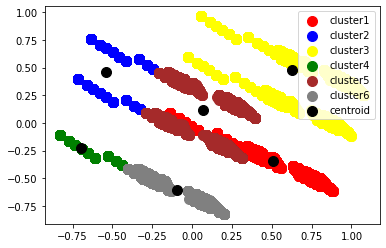

In [11]:
# treinamento modelo
inicio = time.time()

df = DataSource().read_data()
df = Clean_na().drop_col(5,df)
df.drop(['Unnamed: 0', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'qt_filiais'],axis=1,inplace=True)
df = Clean_na().drop_low_var(7,df)
df.drop('dt_situacao', axis=1, inplace=True)
id_df = df['id'].copy()
df_reduced = df.drop('id', axis=1)
df_colum_changed = Feature_engineering().change_columns(df_reduced)
df_labeled = Feature_engineering().encoder(df_colum_changed)
port1, port2, port3, id1, id2, id3 = Busca().busca_id()
df_choiced = df_labeled[['nm_segmento_change','de_ramo_change','de_natureza_juridica_change','nm_divisao_change','de_nivel_atividade_change','idade_change']]
modelo, group = ModelTraining().model_training(df_choiced)

fim = time.time()

print(f'o tempo foi de {round((fim - inicio)/60,2)} minutos')

Carregando o modelo


/home/lucas/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/lucas/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


Foi recomendado: 32.9 % da lista total que são: 70.77 % similares a seus clientes
--------------------------------------------------------------------------------
nm_segmento_change
seus clientes: most_comom0.24 ⊢ 2.00 = 17.0% e most_comom19.81 ⊢ 106.44 = 16.0% 
recomendados: most_comom2.00 ⊢ 4.15 = 19.0% e most_comom4.15 ⊢ 6.93 = 19.0% 
--------------------------------------------------------------------------------
de_ramo_change
seus clientes: COMERCIO VAREJISTA = 89.0%  
recomendados: COMERCIO VAREJISTA = 92.0% 
--------------------------------------------------------------------------------
de_natureza_juridica_change
seus clientes: EMPRESARIO INDIVIDUAL = 89.0%  
recomendados: EMPRESARIO INDIVIDUAL = 92.0% 
--------------------------------------------------------------------------------
nm_divisao_change
seus clientes: Comercio Varegista0.24 ⊢ 2.00 = 89.0%  
recomendados: Comercio Varegista2.00 ⊢ 4.15 = 92.0% 
----------------------------------------------------------------------

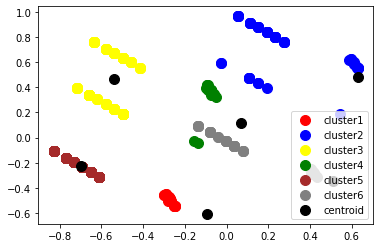

In [10]:
# SOMENTE PREVISÃO
inicio = time.time()

df1 = pd.read_csv('../data/estaticos_portfolio1.csv')
pred1 = ModelInference().predict(df1)
features_recomendadas = Recomendation().leads(pred1, group)

fim = time.time()

print(f'o tempo foi de {round((fim - inicio)/60,2)} minutos')